In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

data= pd.read_csv("Preprocessed Data.csv", dtype={'Zip': str})

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            int64  
 6   Amount          float64
 7   Use Chip        int64  
 8   Merchant Name   int64  
 9   Merchant City   int64  
 10  Merchant State  int64  
 11  Zip             object 
 12  MCC             int64  
 13  Errors?         int64  
 14  Is Fraud?       int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 2.7+ GB


Before Undersampling:
0    24357143
1       29757
Name: Is Fraud?, dtype: int64

After Undersampling:
0    29757
1    29757
Name: Is Fraud?, dtype: int64


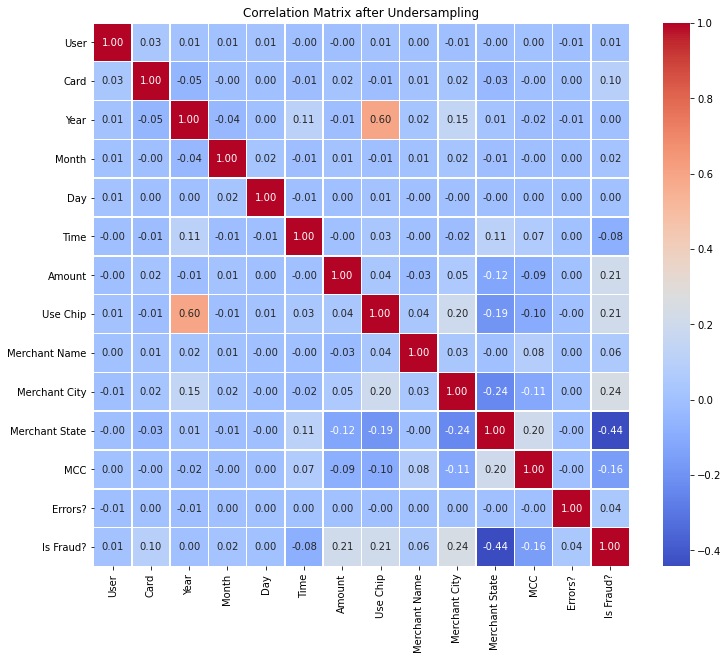

In [2]:
#Random Undersampling

# Target Column: 'Is Fraud?'
X = data.drop("Is Fraud?", axis=1)
y = data["Is Fraud?"]

# Print value counts before applying Undersampling
print("Before Undersampling:")
print(y.value_counts())

# Random Undersampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Concatenate the resampled features and target variable
undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Print value counts after applying Undersampling
print("\nAfter Undersampling:")
print(pd.Series(y_resampled).value_counts())

# Compute the correlation matrix
corr_matrix = undersampled_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix after Undersampling')
plt.show()


In [5]:
undersampled_data.to_csv('Preprocessed Data- Undersampling.csv', index=False)

Before SMOTE:
0    24357143
1       29757
Name: Is Fraud?, dtype: int64

After SMOTE:
0    19485807
1    19485807
Name: Is Fraud?, dtype: int64


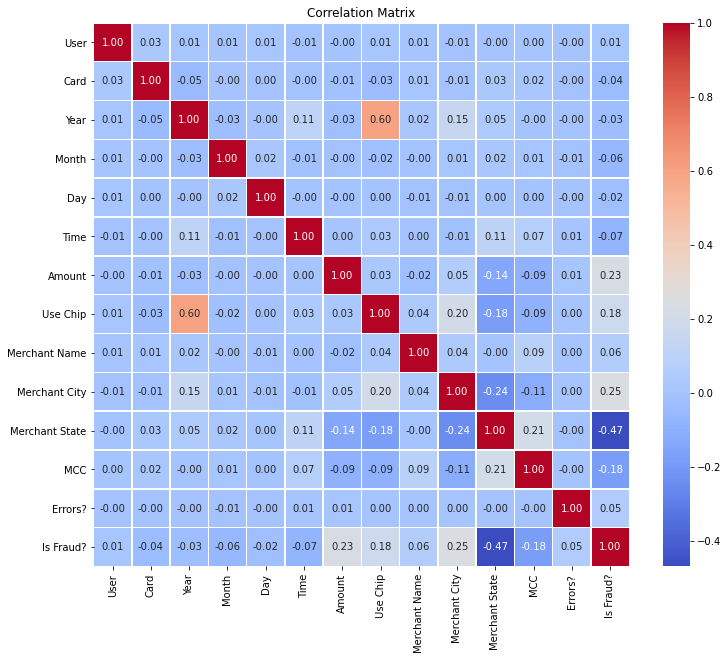

In [4]:
#SMOTE

# Target Column: 'Is Fraud?'
X = data.drop("Is Fraud?", axis=1)
y = data["Is Fraud?"]

# Print value counts before applying SMOTE
print("Before SMOTE:")
print(y.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print value counts after applying SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Combine resampled features and target into a new dataframe
df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.Series(y_train_resampled, name="Is Fraud?")], axis=1)

# Show correlation matrix
correlation_matrix_smote = df_resampled.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_smote, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [6]:
df_resampled.to_csv('Preprocessed Data- Smote.csv', index=False)